In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [3]:
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
dataset=boston.data
for name,index in enumerate(boston.feature_names):
    print(index,name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [5]:
data=dataset[:,12].reshape(-1,1)

In [6]:
np.shape(dataset)

(506, 13)

In [7]:
target=boston.target.reshape(-1,1)

In [8]:
np.shape(target)

(506, 1)

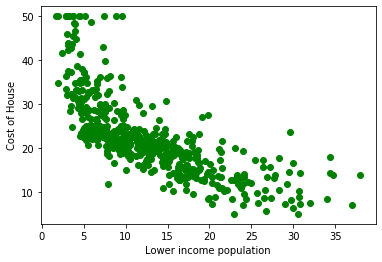

In [9]:
%matplotlib inline
plt.scatter(data,target,color="green")
plt.xlabel('Lower income population')
plt.ylabel('Cost of House')
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(data,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
pred=reg.predict(data)

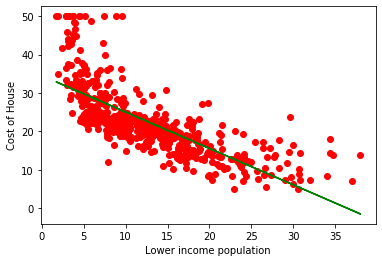

In [12]:
%matplotlib inline
plt.scatter(data,target,color="red")
plt.plot(data,pred,color='green')
plt.xlabel('Lower income population')
plt.ylabel('Cost of House')
plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [14]:
model=make_pipeline(PolynomialFeatures(3),reg)

In [15]:
model.fit(data,target)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [17]:
pred=model.predict(data)

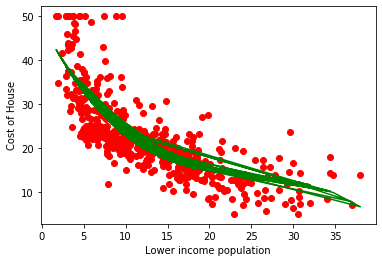

In [18]:
%matplotlib inline
plt.scatter(data,target,color="red")
plt.plot(data,pred,color='green')
plt.xlabel('Lower income population')
plt.ylabel('Cost of House')
plt.show()

In [19]:
from sklearn.metrics import r2_score
r2_score(pred,target)

0.4798911810275662